# Gaussian processes

In this tutorial, we explain how to obtain the functionality of other packages such as GaussianProcesses.jl with GeoStats.jl. Gaussian processes (the method) and Simple Kriging are essentially [two names for the same concept](https://en.wikipedia.org/wiki/Kriging). The derivation of Kriging estimators, however; does **not** require distributional assumptions. [Matheron](https://en.wikipedia.org/wiki/Georges_Matheron) and other important geostatisticians have generalized Gaussian processes to random fields with locally-varying mean and for situations where the mean is unknown. GeoStats.jl includes Gaussian processes as a special case as well as other more practical Kriging variants.

In machine learning, Gaussian processes are usually explained in 1D, and we will do the same here.

Before we proceed, please install the following packages:

In [1]:
] add GeoStats Plots GR Interact

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [2]:
using Random; Random.seed!(2000); # make sure this tutorial is reproducible

## The data

Let's start by drawing a set of points in the real line, each with a known value:

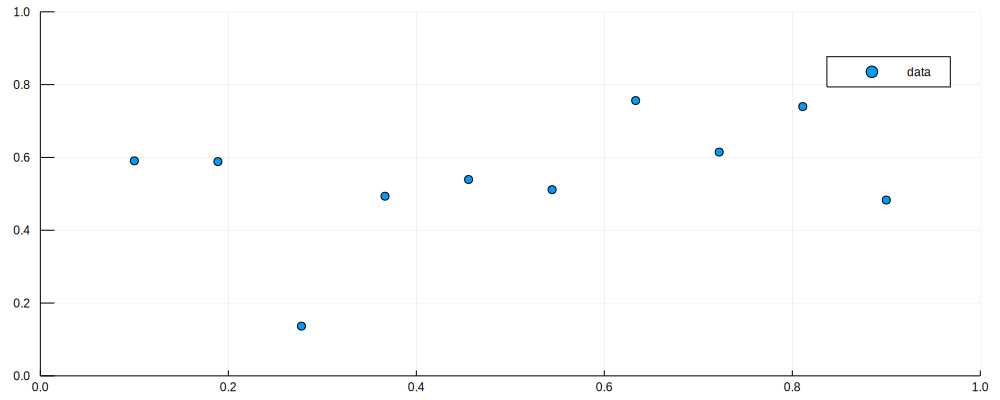

In [3]:
using Plots; gr(size=(1000,400), xlim=(0,1), ylim=(0,1))

x = range(0.1, stop=.9, length=10)
z = rand(10)

scatter(x, z, label="data", size=(1000,400))

We will skip an important step known in geostatistics as *variogram modeling*, and will proceed to the estimation step directly in order to avoid having too many concepts in this tutorial. These concepts are likely new to practioners of machine learning and can be very useful in practice. For more information on variogram modeling, please check the other tutorials in this folder.

## Simple Kriging

In simple Kriging (or Gaussian process), we need to specify a mean and a covariance-type function in order to interpolate the stochastic process at unseen locations. We choose a covariance (or variogram) model in GeoStats.jl and interact with the parameters:

In [4]:
using GeoStats
using Interact

# discretize the line segment for plotting
n = 200
xs = range(0., stop=1, length=n)

@manipulate for s=range(.0, stop=.1, length=50),
                r=range(.1, stop=.2, length=50)
    # some given mean
    process_mean = .5
    
    # spatial structure
    γ = GaussianVariogram(sill=s, range=r)
    
    # create Gaussian process
    simkrig = SimpleKriging(x', z, γ, process_mean)
    
    # estimate mean and variance
    μ = zeros(n)
    σ² = zeros(n)
    for (i,loc) in enumerate(xs)
        μ[i], σ²[i] = estimate(simkrig, [loc])
    end
    
    σ = sqrt.(σ²)
    
    scatter(x, z, label="data")
    plot!(xs, μ, ribbon=σ, fillalpha=.5, label="Gaussian process")
end

HTML{String}("    <script id=\"webio-setup-8606703807364568493\">\n    // Immediately-invoked-function-expression to avoid global variables.\n    (function() {\n        var warning_div = document.getElementById(\"webio-warning-511280190284159348\");\n        var hide = function () {\n            var script = document.getElementById(\"webio-setup-8606703807364568493\");\n            var parent = script && script.parentElement;\n            var grandparent = parent && parent.parentElement;\n            if (grandparent) {\n                grandparent.style.display = \"none\";\n            }\n            warning_div.style.display = \"none\";\n        };\n        if (window.require && require.defined) {\n            // Jupyter notebook.\n            if (require.defined(\"nbextensions/webio/main\")\n                    || require.defined(\"/assetserver/590acafbcd226d3bf9ec4084a43ff404e811ce7e-dist/main.js\")) {\n                // Extension already loaded.\n                hide();\n                return;\n            }\n            console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n            require([\"/assetserver/590acafbcd226d3bf9ec4084a43ff404e811ce7e-dist/main.js\"], function (webIOModule) {\n                webIOModule.load_ipython_extension();\n            });\n            warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n        } else if (window.location.pathname.includes(\"/lab\")) {\n            // Guessing JupyterLab\n            warning_div.innerHTML = \"WebIO does not support JupyterLab yet.\";\n        }\n    })();\n    </script>\n    <div\n        id=\"webio-warning-511280190284159348\"\n        class=\"output_text output_stderr\"\n        style=\"padding: 1em; font-weight: bold;\"\n    >\n        Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n        <!-- TODO: link to installation docs. -->\n    </div>\n")

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:s=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
25,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["0.0", "0.00204082", "0.00408163", "0.00612245", "0.00816327", "0.0102041", "0.0122449", "0.0142857", "0.0163265", "0.0183673"  …  "0.0816327", "0.0836735", "0.0857143", "0.0877551", "0.0897959", "0.0918367", "0.0938776", "0.0959184", "0.0979592", "0.1"],:formatted_value=>Observable{String} with 1 listeners. Value:
"0.0489796",:value=>Observable{Float64} with 2 listeners. Value:
0.0489796), Observable{Float64} with 2 listeners. Value:
0.0489796, Scope("knockout-component-28829b74-56c3-4a39-833a-a5705654e543", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["s"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>50,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["0.0", "0.00204082", "0.00408163", "0.00612245", "0.00816327", "0.0102041", "0.0122449", "0.0142857", "0.0163265", "0.0183673"  …  "0.0816327", "0.0836735", "0.0857143", "0.0877551", "0.0897959", "0.0918367", "0.0938776", "0.0959184", "0.0979592", "0.1"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"0.0489796", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
25, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/juliohm/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/juliohm/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/juliohm/.julia/packages/InteractBase/Q4IkI/src/../assets/all.js", "/home/juliohm/.julia/packages/InteractBase/Q4IkI/src/../assets/style.css", "/home/juliohm/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\

## Ordinary Kriging

An immediate generalization of Simple Kriging is Ordinary Kriging. In this case, we still have the assumption that the mean of the field is constant, but this time we treat it as an unknown. Below is the estimation with Ordinary Kriging where we only need to specify the covariance-type function:

In [5]:
using GeoStats
using Interact

# discretize the line segment for plotting
n = 200
xs = range(0., stop=1, length=n)

@manipulate for s=range(.0, stop=.1, length=50),
                r=range(.1, stop=.2, length=50)
    # spatial structure
    γ = GaussianVariogram(sill=s, range=r)
    
    # create Gaussian process
    ordkrig = OrdinaryKriging(x', z, γ)
    
    # estimate mean and variance
    μ = zeros(n)
    σ² = zeros(n)
    for (i,loc) in enumerate(xs)
        μ[i], σ²[i] = estimate(ordkrig, [loc])
    end
    
    σ = sqrt.(σ²)
    
    scatter(x, z, label="data")
    plot!(xs, μ, ribbon=σ, fillalpha=.5, label="Gaussian process")
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:s=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
25,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["0.0", "0.00204082", "0.00408163", "0.00612245", "0.00816327", "0.0102041", "0.0122449", "0.0142857", "0.0163265", "0.0183673"  …  "0.0816327", "0.0836735", "0.0857143", "0.0877551", "0.0897959", "0.0918367", "0.0938776", "0.0959184", "0.0979592", "0.1"],:formatted_value=>Observable{String} with 1 listeners. Value:
"0.0489796",:value=>Observable{Float64} with 2 listeners. Value:
0.0489796), Observable{Float64} with 2 listeners. Value:
0.0489796, Scope("knockout-component-e4ebcc62-7839-4145-8618-92e6fa3c02db", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["s"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>50,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["0.0", "0.00204082", "0.00408163", "0.00612245", "0.00816327", "0.0102041", "0.0122449", "0.0142857", "0.0163265", "0.0183673"  …  "0.0816327", "0.0836735", "0.0857143", "0.0877551", "0.0897959", "0.0918367", "0.0938776", "0.0959184", "0.0979592", "0.1"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"0.0489796", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
25, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/juliohm/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/juliohm/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/juliohm/.julia/packages/InteractBase/Q4IkI/src/../assets/all.js", "/home/juliohm/.julia/packages/InteractBase/Q4IkI/src/../assets/style.css", "/home/juliohm/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\

# Other generalizations

- We can also have random fields with non-constant mean. In Universal Kriging, the mean is a polynomial on the coordinates of the problem up to a certain degree specified by the user. In External Drift Kriging, the mean can be any external variable (a.k.a. external drift).

- All methods in GeoStats.jl accept general distance functions. We can for example use the Haversine distance to compute covariances between latitude/longitude coordinates directly.

- Other methods for co-estimation and co-simulation will be available in future releases.